Model/Curve fitting

Fitting, Parameter Estimation

In [69]:
from scipy import optimize as som
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Generate data
xdata = np.linspace(0, 10, 100)
noise = st.norm.rvs(0, 10, xdata.shape[0])
yactual = xdata**2 
ydata = yactual + noise

Text(0, 0.5, 'y')

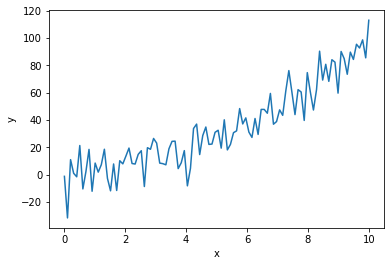

In [76]:
plt.plot(xdata, ydata)
plt.xlabel('x')
plt.ylabel('y')

In [72]:
def polynomial_model(x, p):
    y = x**p
    return y


def polynomial_biased_model(x, p, b):
    y = x**p + b
    return y

def straight_line(x, m, c):
    y = m*x + c
    return y

model 1

In [51]:
popt, pcov = som.curve_fit(polynomial_model, xdata, ydata)
# where popt: optimal parameter, pcov : corresponding error in parameter
yfit_polynomial_model = polynomial_model(xdata, popt)

# p
popt

array([1.99505502])

model 2

In [52]:
popt, pcov = som.curve_fit(polynomial_biased_model, xdata, ydata)
# where popt: optimal parameter, pcov : corresponding error in parameter
yfit_polynomial_biased_model = polynomial_biased_model(xdata, popt[0], popt[1])

# p
popt

array([ 2.00038087, -0.72824672])

model 3

In [53]:
popt, pcov = som.curve_fit(straight_line, xdata, ydata)
# where popt: optimal parameter, pcov : corresponding error in parameter
yfit_straight_line_model = straight_line(xdata, popt[0], popt[1])

# p
popt

array([  9.90525869, -16.72765552])

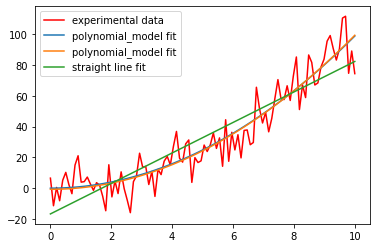

In [54]:
plt.plot(xdata, ydata, 'r', label='experimental data')
plt.plot(xdata, yfit_polynomial_model, label='polynomial_model fit')
plt.plot(xdata, yfit_polynomial_biased_model, label='polynomial_model fit')
plt.plot(xdata, yfit_straight_line_model, label='straight line fit')
plt.legend()

In [55]:
def rmse(ytrue, ypred):
    return np.sqrt((ytrue - ypred)**2).mean()

In [56]:
# Model Selection
print(rmse(ydata, yfit_polynomial_model), rmse(ydata, yfit_polynomial_biased_model), 
rmse(ydata, yfit_straight_line_model))

8.098315840495735 8.125189135597525 10.784641476071988


Modle fitting with error

In [62]:
from scipy import odr

In [60]:
xdata = np.linspace(0, 10, 10)
ydata = xdata**2 

xerr = st.norm.rvs(0, 1, xdata.shape[0])
yerr = st.norm.rvs(0, 10, ydata.shape[0])

<ErrorbarContainer object of 3 artists>

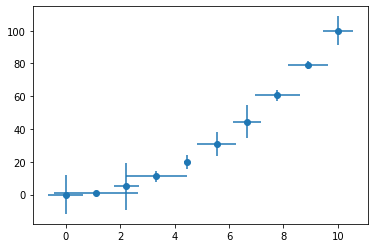

In [61]:
plt.errorbar(xdata, yactual, yerr=yerr, xerr=xerr, fmt='o')

In [63]:
def quard(p, x):
    return x**p

In [64]:
quard_model = odr.Model(quard)
data = odr.RealData(xdata, ydata, sx=xerr, sy=yerr)
fit = odr.ODR(data, quard_model, beta0=[1])
output = fit.run()

In [66]:
estimated_p = output.beta

y_fit = quard(estimated_p, xdata)

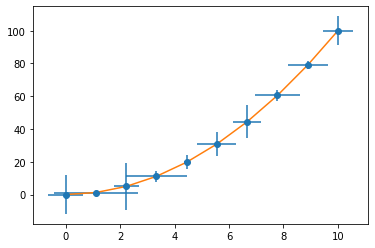

In [67]:
plt.errorbar(xdata, yactual, yerr=yerr, xerr=xerr, fmt='o')
plt.plot(xdata, y_fit)